In [2]:

import numpy as np
import pandas as pd
!pip install netCDF4

from netCDF4 import Dataset


Defaulting to user installation because normal site-packages is not writeable
  Using cached netCDF4-1.5.8.tar.gz (767 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for netCDF4: filename=netCDF4-1.5.8-cp38-cp38-macosx_10_14_6_arm64.whl size=999940 sha256=d3b7faf315bda8bbd1dfe132e61096172032230d8833bdf2155e48e0c0630a03
  Stored in directory: /Users/dafnep/Library/Caches/pip/wheels/7e/7a/56/610e32ffefcfd48e2a08c703d90a97691753cc493c9e64446b
Successfully built netCDF4


In [3]:
my_example_nc_file = '../data/air.mon.mean.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [4]:
fh.variables

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     units: degrees_north
     actual_range: [ 90. -90.]
     long_name: Latitude
     standard_name: latitude
     axis: Y
 unlimited dimensions: 
 current shape = (73,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     units: degrees_east
     long_name: Longitude
     actual_range: [  0.  357.5]
     standard_name: longitude
     axis: X
 unlimited dimensions: 
 current shape = (144,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     long_name: Time
     delta_t: 0000-01-00 00:00:00
     avg_period: 0000-01-00 00:00:00
     prev_avg_period: 0000-00-01 00:00:00
     standard_name: time
     axis: T
     units: hours since 1800-01-01 00:00:0.0
     actual_range: [1297320. 1946016.]
 unlimited dimensions: time
 current shape = (889,)
 filling on, default _FillValue

In [5]:
print(fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    description: Data from NCEP initialized reanalysis (4x/day).  These are the 0.9950 sigma level values
    platform: Model
    Conventions: COARDS
    NCO: 20121012
    history: Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc air.mon.mean.nc
Thu May  4 18:11:50 2000: ncrcat -d time,0,622 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc ./surface/air.mon.mean.nc
Mon Jul  5 23:47:18 1999: ncrcat ./air.mon.mean.nc /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc /dm/dmwork/nmc.rean.ingest/combinedMMs/surface/air.mon.mean.nc
/home/hoop/crdc/cpreanjuke2farm/cpreanjuke2farm Mon Oct 23 21:04:20 1995 from air.sfc.gauss.85.nc
created 95/03/13 by Hoop (netCDF2.3)
Converted to chunked, deflated non-packed NetCDF4 2014/09
    title: monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    Re

In [6]:
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
time = fh.variables['time'][:]
air = fh.variables['air'][:]
#tmax_units = fh.variables['Tmax'].units

In [40]:
air_jan_2022 = air[887]
#data from 1948

In [41]:
#!pip3 install matplotlib
#!pip3 install Basemap
import matplotlib.pyplot as plt
!pip3 install seaborn
import seaborn as sns
#from mpl_toolkits.basemap import Basemap

Defaulting to user installation because normal site-packages is not writeable


In [51]:
temp_mean = air.mean(axis =(1,2))


74
74


<AxesSubplot:>

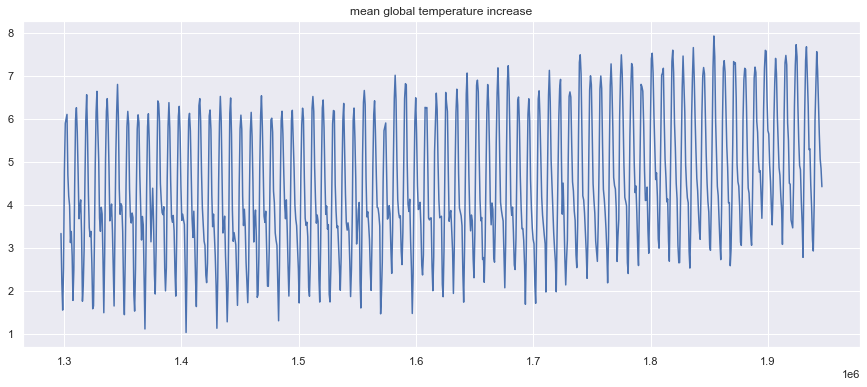

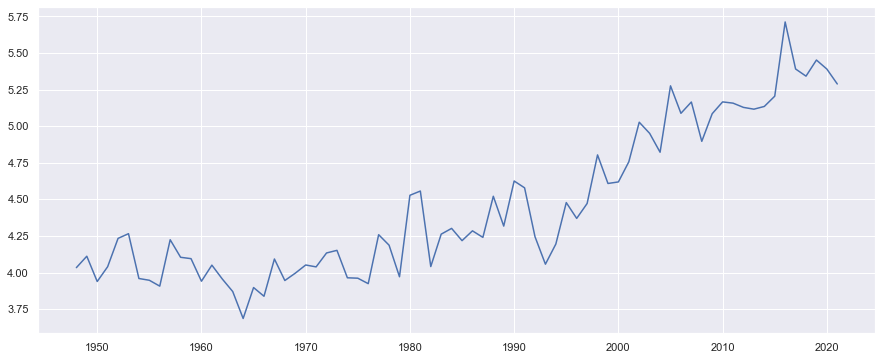

In [52]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))

# Plot the responses for different events and regions
sns.lineplot(x=time, y=temp_mean ,ax=ax)
plt.title('mean global temperature increase')
#detrend data??
temp_mean = temp_mean[0:-1]
avgtemp = np.average(temp_mean.reshape(-1, 12), axis=1)
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))
time2 = np.arange(1948,2022,1)
print(len(time2))
print(len(avgtemp))
# Plot the responses for different events and regions
sns.lineplot(x=time2, y=avgtemp ,ax=ax)

In [32]:
C02 = "../data/co2_mm_mlo2.csv"

In [33]:
data = pd.read_csv(C02 , on_bad_lines='skip')

In [34]:
data

,year,month,decimal date,average,interpolated,trend,ndays,dn
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
762,2021,9,2021.7083,413.30,416.90,27,0.29,0.11
763,2021,10,2021.7917,413.93,417.30,29,0.35,0.12
764,2021,11,2021.8750,415.01,417.07,30,0.36,0.13
765,2021,12,2021.9583,416.71,417.44,28,0.48,0.17


Text(0.5, 1.0, 'mean global CO2 increase')

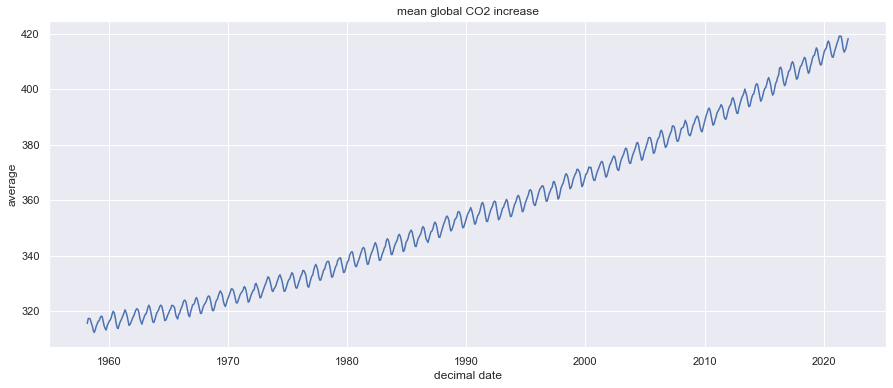

In [35]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))

# Plot the responses for different events and regions
sns.lineplot(x="decimal date", y="average" ,ax=ax , data = data)
plt.title('mean global CO2 increase')

In [36]:
grouped_co2 = data.groupby("year")


mean_co2 = grouped_co2.mean()
mean_co2 = mean_co2.reset_index()

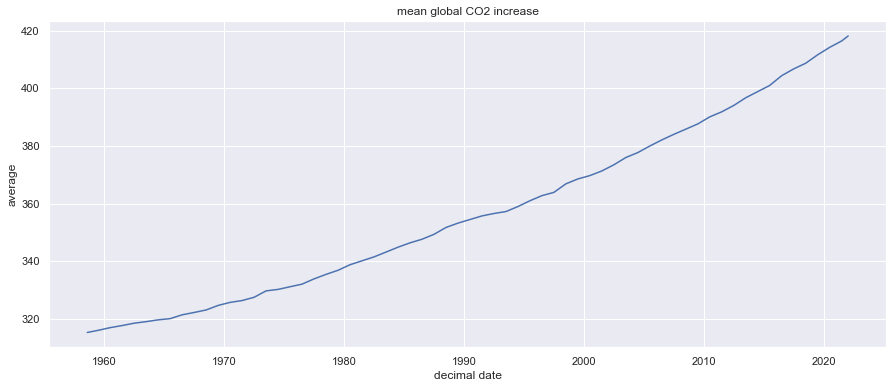

In [38]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))

# Plot the responses for different events and regions
sns.lineplot(x="decimal date", y="average" ,ax=ax , data = mean_co2)
plt.title('mean global CO2 increase')
c02 = mean_co2[['average']].to_numpy()


In [15]:
methane  = pd.read_fwf('../data/methane_1983-today-data.txt')


In [16]:
methane

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.542,1626.0,2.3,1634.7,1.5
1,1983,8,1983.625,1628.0,2.9,1635.3,1.4
2,1983,9,1983.708,1638.4,2.3,1635.9,1.3
3,1983,10,1983.792,1644.8,1.4,1636.5,1.2
4,1983,11,1983.875,1642.6,0.8,1637.3,1.2
...,...,...,...,...,...,...,...
455,2021,6,2021.458,1888.6,-9.9,1894.7,-9.9
456,2021,7,2021.542,1886.5,-9.9,1895.9,-9.9
457,2021,8,2021.625,1892.6,-9.9,1897.0,-9.9
458,2021,9,2021.708,1903.0,-9.9,1898.0,-9.9


In [17]:
precipitation_file = '../data/cru_ts4.05.1901.2020.pre.dat.nc'
pre = Dataset(precipitation_file, mode='r')

In [18]:
pre #too many missing values

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    title: CRU TS4.05 Precipitation
    institution: Data held at British Atmospheric Data Centre, RAL, UK.
    source: Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history: Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegridsauto.for called by update.for
    references: Information on the data is available at http://badc.nerc.ac.uk/data/cru/
    comment: Access to these data is available to any registered CEDA user.
    contact: support@ceda.ac.uk
    dimensions(sizes): lon(720), lat(360), time(1440)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 time(time), float32 pre(time, lat, lon), int32 stn(time, lat, lon)
    groups: 

In [19]:
lonsp = pre.variables['lon'][:]
latsp = pre.variables['lat'][:]
timep = pre.variables['time'][:]
stn = pre.variables['stn'][:]
precipitation = pre.variables['pre'][:]

In [20]:
stn

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --,

In [21]:
!pip install --upgrade matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [22]:

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb

/Users/dafnep/Library/Python/3.8/lib/python/site-packages/tigramite/independence_tests/gpdc.py:16: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/tigramite/independence_tests/gpdc_torch.py:18: UserWarning: No module named 'dcor'
  warnings.warn(str(e))


In [58]:
np.random.seed(42)     # Fix random seed
links_coeffs = {0: [((0, -1), 0.7), ((1, -1), -0.8)],
                1: [((1, -1), 0.8), ((3, -1), 0.8)],
                2: [((2, -1), 0.5), ((1, -2), 0.5), ((3, -3), 0.6)],
                3: [((3, -1), 0.4)],
                }
T = 1000     # time series length
data, true_parents_neighbors = pp.var_process(links_coeffs, T=T)
T, N = data.shape
avgtemp2 = avgtemp[10:]
data2 = np. array([[avgtemp2],[c02]],dtype="object")

# Initialize dataframe object, specify time axis and variable names
var_names = [r'$temp$', r'$co2$']
dataframe = pp.DataFrame(data2, 
                         datatime = np.arange(len(data2)), 
                         var_names=var_names)

In [65]:
data.shape
data[0]

array([ 0.49671415,  1.39935544, -0.67517827, -1.90780756])

ValueError: setting an array element with a sequence.

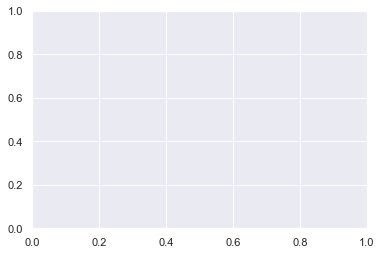

In [60]:
tp.plot_timeseries(dataframe); plt.show()


In [26]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable $X^0$ has 7 link(s):
    [pc_alpha = 0.3]
        ($X^0$ -1): max_pval = 0.00000, min_val =  0.796
        ($X^1$ -1): max_pval = 0.00000, min_val = -0.748
        ($X^3$ -2): max_pval = 0.13715, min_val =  0.048
        ($X^3$ -1): max_pval = 0.19326, min_val = -0.042
        ($X^2$ -1): max_pval = 0.20477, min_val = -0.041
        ($X^3$ -7): max_pval = 0.25822, min_val =  0.036
        ($X^1$ -4): max_pval = 0.26548, min_val =  0.036

    Variable $X^1$ has 4 link(s):
    [pc_alpha = 0.3]
        ($X^1$ -1): max_pval = 0.00000, min_val =  0.695
        ($X^3$ -1): max_pval = 0.00000, min_val =  0.484
        ($X^3$ -7): max_pval = 0.14660, min_val =  0.046
        ($X^2$ -1): max_pval = 0.22144, min_val = -0.039

    Variabl

In [27]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=8, fdr_method='fdr_bh')

link_matrix = pcmci.return_significant_links(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

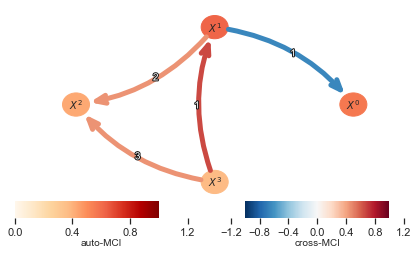

In [28]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    ); plt.show()

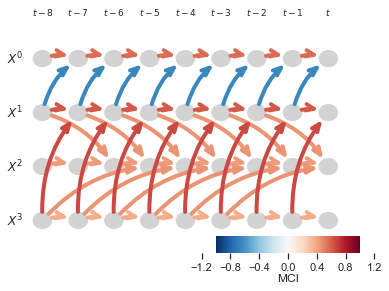

In [29]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

In [ ]:
age_array = df[['Age']].to_numpy()
